# Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver e inclua o parâmetro decimal ',' para o pandas identificar os números corretamente

In [1]:
import pandas as pd

cadastroClientes_df = pd.read_csv(r'base_dados//CadastroClientes.csv',sep=';', dtype={'ID Clientes':str, 'Valor Contrato Mensal':float})

cadastroFuncionarios_df = pd.read_csv(r'base_dados//CadastroFuncionarios.csv',sep=';', decimal=',',dtype={'ID Funcionário':str,'Estado Civil':str,'Nome Completo':str,'Salario Base':float,'Impostos':float,'Beneficios':float,'VT':float,'VR':float})

baseServicosPrestados_df = pd.read_excel(r'base_dados//BaseServiçosPrestados.xlsx', dtype={'ID Funcionário':str})

#Verifica o tipo dos dados

cadastroClientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID Cliente             320 non-null    int64  
 1   Cliente                320 non-null    object 
 2   Valor Contrato Mensal  320 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


In [2]:
# 1 - Valor Total da Folha Salarial

total_vlr_folha_salarial = cadastroFuncionarios_df['Salario Base'] + cadastroFuncionarios_df['Beneficios'] + cadastroFuncionarios_df['Impostos'] + cadastroFuncionarios_df['VR'] + + cadastroFuncionarios_df['VT'] 

print('Valor Total da Folha Salarial Mensal R$ {:,}'.format(total_vlr_folha_salarial.sum()))

Valor Total da Folha Salarial Mensal R$ 2,717,493.22


In [3]:
# 2 - Faturamento da empresa

vlr_contrato_mensal_cliente = baseServicosPrestados_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(cadastroClientes_df[['ID Cliente','Valor Contrato Mensal']],on='ID Cliente',how='inner')

vlr_contrato_mensal_cliente['Vlr Contrato Mensal'] = vlr_contrato_mensal_cliente['Tempo Total de Contrato (Meses)'] * vlr_contrato_mensal_cliente['Valor Contrato Mensal']

print('Faturamento total da Empresa {:,.2f}'.format(vlr_contrato_mensal_cliente['Vlr Contrato Mensal'].sum()))


Faturamento total da Empresa 5,519,160.00


In [4]:
# 3 - % de funcionários que já fechou algum contrato

qtde_funcionario_com_contrato = len(baseServicosPrestados_df['ID Funcionário'].unique())

qtde_funcionario_sem_contrato = len(cadastroFuncionarios_df['ID Funcionário'].unique())

print('{:.2%} dos funcionários fecharam contratos'.format(qtde_funcionario_com_contrato/qtde_funcionario_sem_contrato))

86.84% dos funcionários fecharam contratos


In [5]:
# 4 - Calcule o total de contratos que cada área da empresa já fechou

total_contrato_empresa_area = baseServicosPrestados_df[['ID Funcionário']].merge(cadastroFuncionarios_df[['ID Funcionário','Area']],on='ID Funcionário')

display(total_contrato_empresa_area.value_counts('Area'))


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64

<Axes: xlabel='Area'>

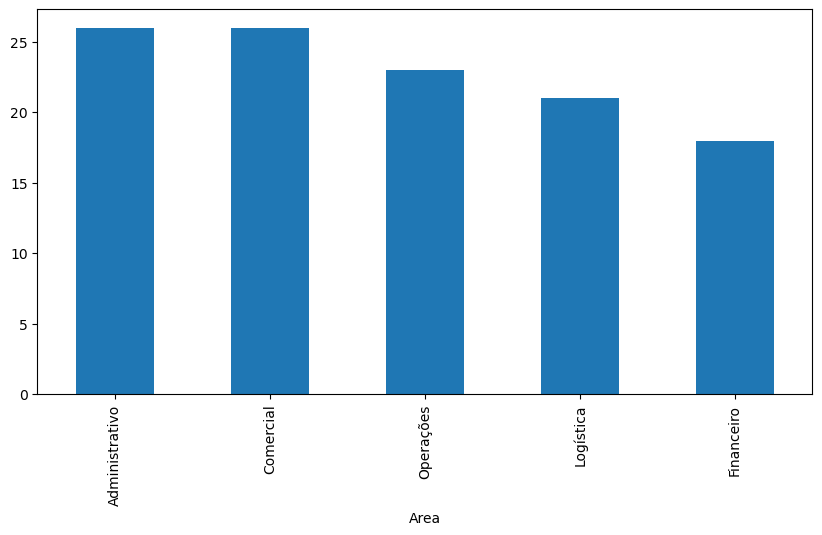

In [6]:
# 5 - Total de funcionários por área

qtde_funcionario_area = cadastroFuncionarios_df.value_counts('Area')

qtde_funcionario_area.plot(kind='bar', figsize=(10,5))

In [7]:
# 6 - Ticket médio mensal

ticket_medio_mensal = cadastroClientes_df['Valor Contrato Mensal'].mean()

print('O ticker médio é de R$: {:,.2f}'.format(ticket_medio_mensal))

O ticker médio é de R$: 2,502.56
